In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, datasets, preprocessing
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import *
import sys

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:

file_dir_list=["/content/drive/MyDrive/Torque and ROP Modeling Data/17.5in Drilling.csv","/content/drive/MyDrive/Torque and ROP Modeling Data/12.25in Drilling.csv","/content/drive/MyDrive/Torque and ROP Modeling Data/8.5in Drilling.csv"]
# tsv_file2=sys.argv[2]

dataframe_list=[pd.read_csv(i) for i in file_dir_list ]
data = pd.concat(dataframe_list)
if "Unnamed: 0" in data.columns:
  data.drop("Unnamed: 0",axis=1)
if "TIME" in data.columns:
  data=data.drop('TIME',axis=1)


train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

featuresX=train[[col for col in data.columns if((col != "ROP (m/h)"))]]
classY=train[["ROP (m/h)"]]
X_train, X_test, y_train, y_test = train_test_split(featuresX, classY, test_size=0.25)
# print(classY)

train.head()

,Unnamed: 0,MD,BPOS (m),DBTM (m),HKLD (t),ROP (m/h),RPM (rpm),SPPA (kPa),SWOB (t),TFLO (L/min),...,rateBuild,rateTurn,sagAziCor,sagIncCor,stnGridCorUsed,stnMagDeclUsed,tvd,tvdDelta,vertSect,Section
52163,52163,1554.950634,14.217200,1554.950634,128.341161,17.958396,129.5,22980.594207,2.263130,2225.493488,...,0.007772,-0.294593,0.0,-19.009734,-0.750124,-1.642378,1510.001790,37.889272,-141.831437,17.50
28308,28308,2698.326734,13.035686,2698.326734,163.172144,9.984334,130.0,18276.863949,1.109941,3159.914307,...,-0.106022,0.089536,0.0,-13.005288,-0.950000,-2.050000,2539.734290,37.367970,227.958336,12.25
159354,159354,3188.575284,25.072848,3188.575284,124.613164,31.290768,123.5,22598.463347,14.358466,2021.849975,...,0.016591,0.029809,0.0,0.000000,-0.950000,-2.090000,2706.004821,16.505703,1279.021269,8.50
138823,138823,2335.209961,42.669998,2335.209961,148.246348,19.680000,124.0,27073.999026,5.047595,3235.797142,...,0.017030,0.184928,0.0,-7.774552,-0.286461,-0.627199,2220.509510,36.864748,-50.219653,17.50
308274,308274,3544.860108,52.669998,3544.860108,145.115812,20.240000,119.0,15349.000549,8.575813,2090.969970,...,-0.089572,0.053171,0.0,0.000000,-0.950000,-2.080000,2892.172058,10.568615,1012.873600,8.50


In [10]:
print("train:",train.shape)
print("test:",test.shape)
print("data shape: ",data.shape)

train: (738518, 56)
test: (117692, 56)
data shape:  (923148, 56)


In [11]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    
    return accuracy

In [12]:
features_test_x=test[[col for col in data.columns if((col != "ROP (m/h)"))]]
class_test_y=test[["ROP (m/h)"]]

In [13]:
from pandas.core.common import random_state
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': [55]}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=False)  


lr= model_cv.fit(X_train,y_train)
y_predict=lr.predict(X_test)
print("The coefficient of determination(r squared) obtained from Linear Regression:\n")
######score here returns The coefficient of determination(r squared) the closer to 1 the better model
print(lr.score(X_train,y_train),"\n") 
##print(pd.DataFrame(model_cv.cv_results_))
print("best model:",model_cv.best_estimator_)
print("best parameters: ",model_cv. best_params_)
print("\n")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
The coefficient of determination(r squared) obtained from Linear Regression:

0.5997796250131262 

best model: RFE(estimator=LinearRegression(), n_features_to_select=55)
best parameters:  {'n_features_to_select': 55}




In [19]:
# evaluate(lr,features_test_x,class_test_y.values.flatten())
y_predicted = lr.predict(features_test_x)
predicted=pd.DataFrame((y_predicted),columns=["ROP Predicted"])


(117692, 1)
(117692, 1)


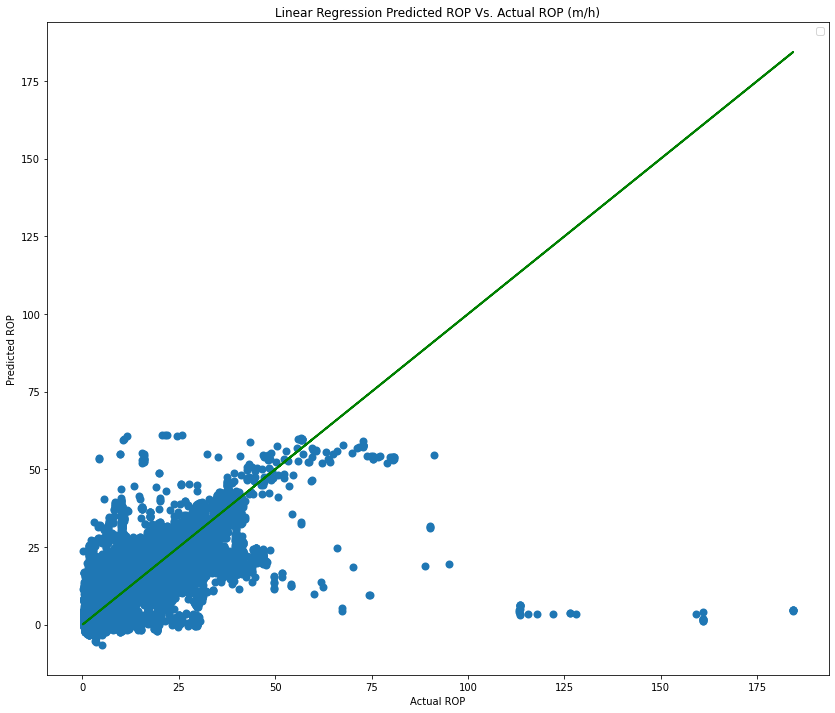

In [21]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure() 

fig.set_size_inches(14,12) 

y1 = class_test_y.sort_index(axis=1)
print(y1.shape)


y2 = predicted[["ROP Predicted"]].sort_index(axis=1)
print(y2.shape)


plt.plot(y1, y1, color='green', linewidth=2,linestyle='-')
plt.scatter(y1, y2, marker='o', linewidth=2,linestyle='-') 
# naming the x axis
plt.xlabel('Actual ROP')
# naming the y axis
plt.ylabel('Predicted ROP')


plt.title('Linear Regression Predicted ROP Vs. Actual ROP (m/h)')




plt.legend()

plt.show()


In [ ]:
!pip install dataprep
from dataprep.eda import create_report


In [ ]:
import sys
import os
#change the directory wher you want the EDA report saved
output_directory='/content/drive/MyDrive/Colab Notebooks/reports/'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)
report=create_report(data)
report.save(output_directory+'all_sections_combined_with_drilling_status.html')


The most popular resampling technique to metigate overfitting is k-fold cross validation. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.


In [22]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [10]
    # 'max_depth': [int(x) for x in np.linspace(10, 110, num = 21)]
             }
# # step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 10)
regr = RandomForestRegressor(random_state = 10)
# # rfe_random_forest = RFE(regr,n_features_to_select=10)             

m3_cv = GridSearchCV(estimator = regr,
                     param_grid = param_grid,
                     scoring= 'r2',
                     cv=folds,
                     return_train_score=False,
                     verbose= 1,
                     n_jobs=-1)  


forest_model= m3_cv.fit(X_train,y_train.values.flatten())


print(f"The coefficient of determination(r squared) obtained from RandomForestRegressor: {forest_model.score(X_train,y_train)}\n")
######score here returns The coefficient of determination(r squared) the closer to 1 the better model
# print(m3_cv.score(X_train,y_train.values.faltten()),"\n") 
##print(pd.DataFrame(m3_cv.cv_results_))
print("best model:",forest_model.best_estimator_)
print("best parameters: ",forest_model.best_params_)
print("\n")



Fitting 3 folds for each of 1 candidates, totalling 3 fits
The coefficient of determination(r squared) obtained from RandomForestRegressor: 0.9968890193284686

best model: RandomForestRegressor(n_estimators=10, random_state=10)
best parameters:  {'n_estimators': 10}




In [23]:
evaluate(forest_model,features_test_x,class_test_y.values.flatten())

Model Performance
Average Error: 0.1677
Accuracy = 98.1508%.


98.15076797493546

(117692, 1)
(117692, 1)


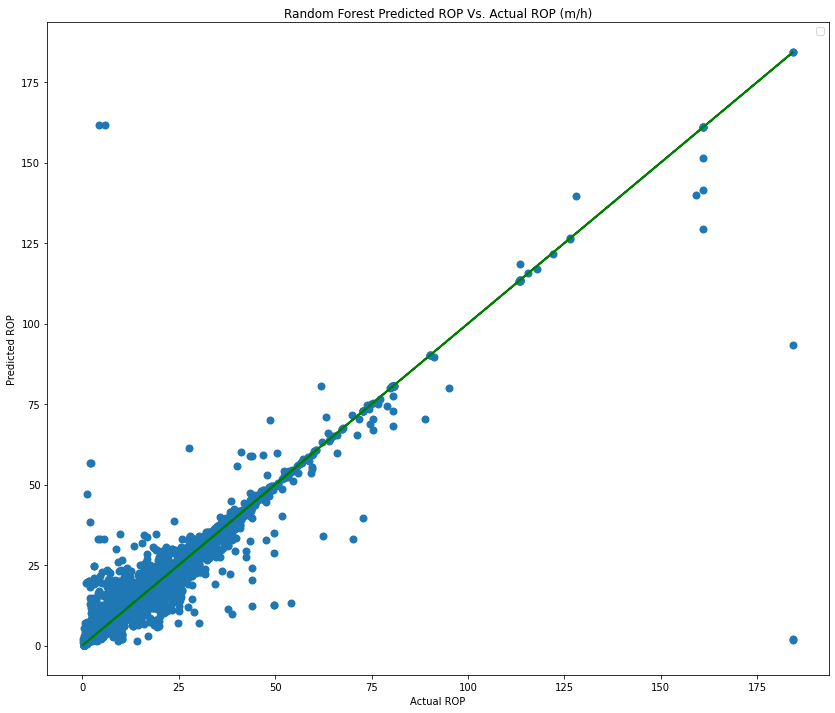

In [24]:
#predict the y values

y_predicted = forest_model.predict(features_test_x)
predicted=pd.DataFrame((y_predicted),columns=["ROP Predicted"])


fig = plt.figure() 

fig.set_size_inches(14,12) 
# # line 1 points
y1 = class_test_y.sort_index(axis=1)
print(y1.shape)
# # # plotting the line 1 points 

y2 = predicted[["ROP Predicted"]].sort_index(axis=1)
print(y2.shape)
# plotting the line 2 points 
# plt.scatter(x2, y2, label = "Predicted Data", color='red', marker='.')

plt.plot(y1, y1, color='green', linewidth=2,linestyle='-')
plt.scatter(y1, y2, marker='o', linewidth=2,linestyle='-') 
# naming the x axis
plt.xlabel('Actual ROP')
# naming the y axis
plt.ylabel('Predicted ROP')


plt.title('Random Forest Predicted ROP Vs. Actual ROP (m/h)')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [25]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
# load the dataset

# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)
# define new data
# new_data = asarray([row])
# make a prediction
yhat = model.predict(X_test)
# summarize prediction

[13:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
print("the coefficient determination  of XGBoost is: ", model.score(X_train, y_train))

the coefficient determination  of XGBoost is:  0.7883310836807551


In [27]:
evaluate(model,features_test_x,class_test_y.values.flatten())

Model Performance
Average Error: 2.5353
Accuracy = 58.0852%.


58.08523789934999

(117692, 1)
(117692, 1)


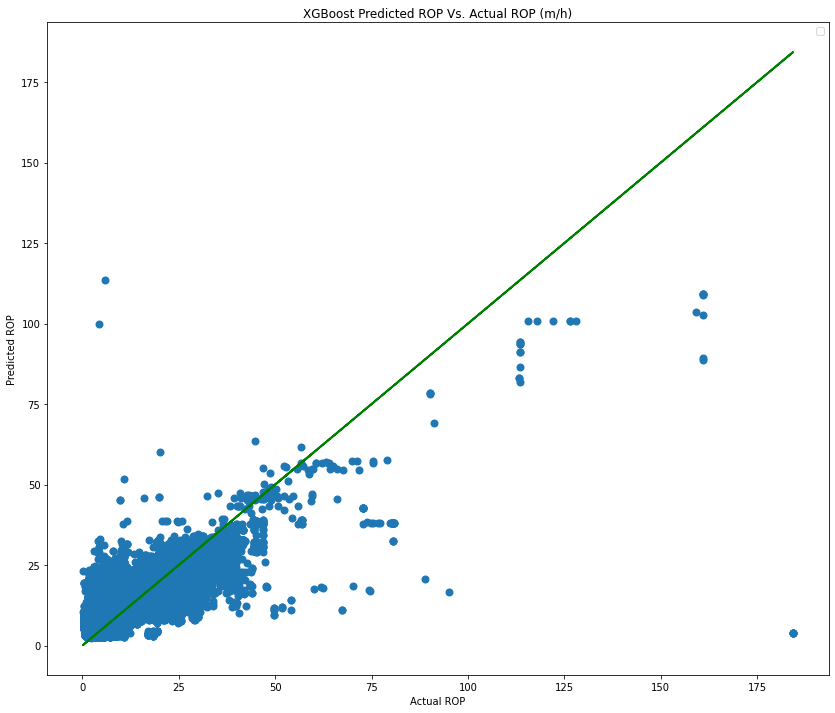

In [30]:
#predict the y values

y_predicted = model.predict(features_test_x)
predicted=pd.DataFrame((y_predicted),columns=["ROP Predicted"])


fig = plt.figure() 

fig.set_size_inches(14,12) 
# # line 1 points
y1 = class_test_y.sort_index(axis=1)
print(y1.shape)
# # # plotting the line 1 points 

y2 = predicted[["ROP Predicted"]].sort_index(axis=1)
print(y2.shape)
# plotting the line 2 points 
# plt.scatter(x2, y2, label = "Predicted Data", color='red', marker='.')

plt.plot(y1, y1, color='green', linewidth=2,linestyle='-')
plt.scatter(y1, y2, marker='o', linewidth=2,linestyle='-') 
# naming the x axis
plt.xlabel('Actual ROP')
# naming the y axis
plt.ylabel('Predicted ROP')


plt.title('XGBoost Predicted ROP Vs. Actual ROP (m/h)')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

But overfitting should not be confused with model selection.

We choose a predictive model or model configuration based on its out-of-sample performance. That is, its performance on new data not seen during training.
